# Exercise 5-1 & 5-2
  
## Taniya Adhikari  
   
### 10/4/2020


In [26]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import analytic

import thinkstats2
import thinkplot

## Exercises

**Exercise 5-1:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

`scipy.stats` contains objects that represent analytic distributions

In [27]:
import scipy.stats

For example <tt>scipy.stats.norm</tt> represents a normal distribution.

In [28]:
mu = 178  # mean in cm
sigma = 7.7  # std in cm
dist_norm = scipy.stats.norm(loc=mu, scale=sigma)  # creates a normal distribution 

A "frozen random variable" can compute its mean and standard deviation.

In [29]:
dist_norm.mean(), dist_norm.std()

(178.0, 7.7)

It can also evaluate its CDF.  How many people are more than one standard deviation below the mean?  About 16%

In [30]:
dist_norm.cdf(mu-sigma)

0.1586552539314574

**5-1: How many people are between 5'10" and 6'1"?**

In [31]:
# 5'10" in centimeters
low_height_cm = (5+(10/12))*30.48 

# 6'1" in centimeters
high_hieght_cm = (6+(1/12))*30.48

# It is the area between 6'1" and 5'10" in the height distribution
dist_norm.cdf(high_hieght_cm) - dist_norm.cdf(low_height_cm)

0.3427468376314751

**Answer 5-1:** About 34.3% of population falls between the hieght of 5'10" and 6'1" ft.

**Exercise 5-2:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

**Answer 5-2:**

In [32]:
alpha = 1.7
xmin = 1       # meter
dist_pareto = scipy.stats.pareto(b=alpha, scale=xmin)   # creates pareto distribution for height


In [33]:
dist_pareto.median()

1.5034066538560549

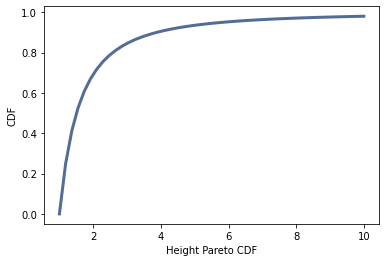

In [34]:
# pareto CDF plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=1, alpha=1.7, low=0, high=10)
thinkplot.Plot(xs, ys)

thinkplot.Config(xlabel='Height Pareto CDF',
                 ylabel='CDF', loc='lower left')

What is the mean height in Pareto world?

In [35]:
# mean height in pareto
dist_pareto.mean()

2.428571428571429

The **mean** height in pareto world is 2.43 m

What fraction of people are shorter than the mean?

In [96]:
# calculates area below mean height

dist_pareto.cdf(dist_pareto.mean())

0.778739697565288

**About 77.8% of people has height below the mean height.**

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [22]:
# percent of people expected to have height above 1 km multiplied by 7e9 to find the number of people
h = (1 - dist_pareto.cdf(1000))*7e9
h2 = round(h)
h, h2

(55602.976430479954, 55603.0)

How tall do we expect the tallest person to be?

In [23]:
tall = dist_pareto.ppf(1 - 1/7e9)
tall

618349.6106759505

In [24]:
# also equals to xmin
short = dist_pareto.ppf(1/7e9)
short

1.0000000000840337

In [25]:
print("On average 77.97% of population has a height below mean = {}".format(dist_pareto.mean()))
print("Out of total population, {} ~ {} people to be taller than 1 km".format(h, h2))
print("Tallest person is expected to be around {} km".format(round(tall)))
print("Shortest person is expected to be around {} km".format(round(short)))


On average 77.97% of population has a height below mean = 2.428571428571429
Out of total population, 55602.976430479954 ~ 55603.0 people to be taller than 1 km
Tallest person is expected to be around 618350.0 km
Shortest person is expected to be around 1.0 km
